# Introduction

The goal of this project is to analyse biodiversity data from the National Parks Service, particularly around various species observed in national parks.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are some of the questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping

It is good practice to start any new project by creating a project scope. The sections below will outline and help guide the projects process and progress. 

### Project Goals

The best place to start the projects scope is with the projects goals. This projects perspective will be through a biodiversity analyst for the National Parks Service (abbreviated to NPS going foward). The NPS wants to ensure the survival of endangered and at-risk species in order to maintain the level of biodeiversity within their parks. Therefore, the main objectives of an analyst will be understanding characterists of the species within the parks and their conservation status, also those species relationship to the national parks.

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks? 

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

This section is where the decriptive statistics and data visualisation techniques are emplyed to better understand the data. Tools such as statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics to be computed include:

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.


## Import Python Modules

First start by importing the primary modules to be used throughout the project. 

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

## Loading The Data

In order to start analysing the data from the csv files it must first be converted into a format the is accessible and has the ability to be explored and visualised within Python. 

The next few steps loads in `observations.csv` and `species_info.csv` as `DataFrames` called `observations` and `species` respectively. The newly created `DataFrames` are then glimpsed with the `.head()` function for a quick check of their contents.

#### Observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [2]:
observations = pd.read_csv('../raw_data/observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status


In [3]:
species = pd.read_csv('../raw_data/species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### Data Characteristics

Next there will be a check of the dimensions of both datasets. `observations` has 23296 rows and 3 columns while `species` has 5824 rows and 4 columns.  

In [4]:
print(f'Observations Shape: {observations.shape}')
print(f'Species Shape: {species.shape}')

Observations Shape: (23296, 3)
Species Shape: (5824, 4)


Then we will look at the number of `category` and the different decribed species. In total there  7 distinct categories 5 of which are animals and 2 are plants.

In [5]:
print(f'Number of Categories: {species.category.nunique()}')
print(f'Categories: {species.category.unique()}')

Number of Categories: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Lets go one step deeper and look at the count for each of these categories and get a feel for the spread of species that has been recorded. As you can see `Vascular Plant` makes up the majority of species with over 4470 counts with `Reptile` having the fewest at 79.

In [6]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Another column worth exploring is `conservation_status`. There are the categories `Species of Concern`, `Endangered`, `Threatened`, `In Recovery` and `NaN` values.

In [7]:
print(f'Number of conservation statuses: {species.conservation_status.nunique()}')
print(f'Conservation Statuses: {species.conservation_status.unique()}')

Number of conservation statuses: 4
Conservation Statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Next is a count of the conservation statueses. There are 5633 NaN values meaning that there are that many species without a concern as far as conservation. There are also 16 endangered, 4 in recovery and 161 species of concern. 

#### Note

While commonly having NaN values requires the data to be treated carefully, in this particular dataset it means that the species is nnot under any conservation status.

In [8]:
print(f'Is NaN: {species.conservation_status.isna().sum()}')
print(species.groupby('conservation_status').size())

Is NaN: 5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


#### Observations

The next section looks at `obseravtions`. Lets first look at the total number of parks and we can see there are 4 different parks. If we also look at how many observations are in the dataset we can see that there are 3,314,739 observations that have been made. Thats a lot of data to deal with!

In [9]:
print(f'Total Number of parks: {observations.park_name.nunique()}')
print(f'{observations.park_name.unique()}')

Total Number of parks: 4
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [10]:
print(f'Total number of observations: {observations.observations.sum()}')

Total number of observations: 3314739


## Analysis

This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [11]:
species.fillna('No Intervention', inplace=True)
species.groupby('conservation_status').count()

,category,scientific_name,common_names
conservation_status,,,
Endangered,16,16,16
In Recovery,4,4,4
No Intervention,5633,5633,5633
Species of Concern,161,161,161
Threatened,10,10,10


Next we can look at the different categories that are nested within conversvation status. We can start to exclude those with `No Intervention` as they aren't the current focus of the analysis. Below is a chart and some graphs to illustrate this exploration.

For those in the `Endangered` status, 7 were mammals and 4 were brids. In the `In Recovery` status, 3 were birds and 1 was mammal which could suggest that birds are recovering better than mammals.

In [12]:
conservation_category = species[species.conservation_status != 'No Intervention']\
    .groupby(['conservation_status', 'category'])['scientific_name']\
        .count().unstack()
conservation_category.reset_index()

category,conservation_status,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
0,Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
1,In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
2,Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
3,Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


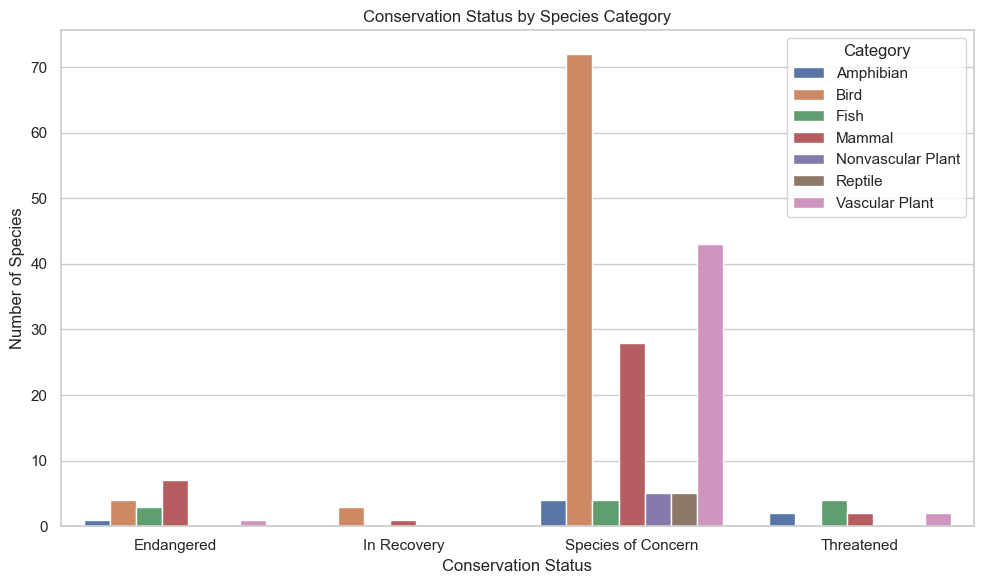

<Figure size 640x480 with 0 Axes>

In [13]:
# Reshape the DataFrame for seaborn
conservation_category_reset = conservation_category.reset_index().melt(id_vars='conservation_status', var_name='category', value_name='count')

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
ax = sns.barplot(
    data=conservation_category_reset,
    x='conservation_status',
    y='count',
    hue='category'
)
plt.title('Conservation Status by Species Category')
plt.ylabel('Number of Species')
plt.xlabel('Conservation Status')
plt.legend(title='Category')
plt.tight_layout()
plt.show()
plt.clf()

In [14]:
conservation_category_reset

,conservation_status,category,count
0,Endangered,Amphibian,1.0
1,In Recovery,Amphibian,NaN
2,Species of Concern,Amphibian,4.0
3,Threatened,Amphibian,2.0
4,Endangered,Bird,4.0
5,In Recovery,Bird,3.0
6,Species of Concern,Bird,72.0
7,Threatened,Bird,NaN
8,Endangered,Fish,3.0
9,In Recovery,Fish,NaN


### More Endangered

Is one species more likely to be endangered than another? To look at this we can create a new column `is_protected` that will include any speices that have a value other than `No Intervention`.

In [15]:
species['is_protected'] = species.conservation_status != 'No Intervention'

With this column created we can group by `category` and `is_protected` to see if one speices has a higher rate of being endangered than another.

The chart below makes is clear to see that `Birds`, `Mammals` and `Vascular Plants` have the higher absolute number of induviduals that need protection. 

In [16]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Absolute numbers may not always be the best data for direct comparisson. For instance there are roughly 4300 observed species of vascular plant in the data but only 79 amphibians. Looking at a rate of protection for each category may provide some more insight. 

If we look at `protection_rate` we can see that ~ 15% of birds are under protection and that ~ 17% of mammals are under protection.

In [17]:
category_counts['protection_rate'] = category_counts.protected / \
    (category_counts.protected + category_counts.not_protected) * 100
category_counts = category_counts.round({'protection_rate': 2})
    
category_counts    

,category,not_protected,protected,protection_rate
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


### Statistical Signifigance

This next section will run chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The first one we shall look at is mammals and birds. running a chi-squared test provides a lot of numbers but we will only focus on the `P-Value`. For Mammals and Birds the `P-Value` was 0.688 and the standard `P-Value` to test statisticall signifigance is 0.05. In the case of mammals and birds there doesn't appear to be and statistical signifigance. 

In [18]:
from scipy.stats import chi2_contingency 

In [19]:
contingency_1 = [[30,146],[75,413]]

chi2_contingency(contingency_1)

Chi2ContingencyResult(statistic=np.float64(0.1617014831654557), pvalue=np.float64(0.6875948096661336), dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

#### Mammals and Vascular Plants

We will look at a few more chi-squared tests before moving on. The `P-Value` of Mammals and Vascular plants is 1.44e-55, a tiny number, we can see there is a clear statistical signifigance and that Mammals are in need of more protection than Vascular Plants

In [20]:
contingency_2 = [[30,146],[46,4216]]

chi2_contingency(contingency_2)

Chi2ContingencyResult(statistic=np.float64(246.5870424874456), pvalue=np.float64(1.4405067309854046e-55), dof=1, expected_freq=array([[3.01397026e+00, 1.72986030e+02],
       [7.29860297e+01, 4.18901397e+03]]))

#### Mammals and Reptiles

Lets do one more before moving on and lets look at the chi-square for Mammals and Reptiles. Here we get a `P-Value` of 0.038 which, when compared to that statistical signifigance value of 0.05, shows that Mammals also have a statistically higher need of more protection than Reptiles.

In [21]:
contingency_3 = [[30,146],[5,73]]

chi2_contingency(contingency_3)

Chi2ContingencyResult(statistic=np.float64(4.289183096203645), pvalue=np.float64(0.03835559022969898), dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

## Species in Parks

The next bit of analysis will focus on the data the conservationsists have been recording over the last 7 days recording species sightings across 4 national parks.

The first step will be to look at the common names and get a sense of the most common animals.

In [22]:
from itertools import chain
import string

In [25]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

list_of_common_name = species[species.category == 'Mammal']\
    .common_names.apply(remove_punctuation).str.split().to_list()
    
list_of_common_name[:5]        

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

Now lets remove words that have been repeated as we don't want to count the same animal more than once.

In [26]:
common_names_clean = []

for i in list_of_common_name:
    i = list(dict.fromkeys(i))
    common_names_clean.append(i)
    
common_names_clean[:5]    

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

For even easier use lets colapse `common_names_clean` into one list.

In [27]:
common_names_fin = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in common_names_clean))

common_names_fin[:5]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison']

With this list we can now count the occourance of each word in `common_name_fin` We can see the `Bat` occours 23 times and `shrew` occours 18 times.

In [45]:
from collections import Counter

word_count = Counter(common_names_fin)
words_counted = pd.DataFrame(word_count.items(), columns=['word', 'count'])
words_counted = words_counted.sort_values('count', ascending=False)
words_counted.head()

,word,count
51,Bat,23
110,Shrew,18
57,Myotis,17
88,Mouse,16
107,Chipmunk,13


The data has several different scientific names for bats. To figure out which rows of `species` are refering to bat is to create a simple column `is_bat` with simple boolean variables to check if `is_bat` is True

In [50]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex=True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Below is a filtered list of all the bat species in `species` displaying a mix of protected and non-protected bats.

In [51]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


#### Bats Across National Parks

In order to look at bats across national parks we can merge the DataFrame with `observations` across the four national parks. 

In [52]:
bats_in_parks = observations.merge(species[species.is_bat])
bats_in_parks.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
2,Nycticeius humeralis,Yellowstone National Park,219,Mammal,Evening Bat,No Intervention,False,True
3,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
4,Lasiurus borealis,Yosemite National Park,134,Mammal,"Eastern Red Bat, Red Bat",No Intervention,False,True


Now we can look at the counts of the bats across each park. We can see that `Yellowstone National Park` had the highest number of observations of 8362 bats.

In [57]:
bats_in_parks.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Now lets look at protected vs non-protected bats across parks. We can see that in all parks except for Great Smoky Mountains National Park that there are highger sightings of protected bats that not. This could be a great indicator of bats recouperating in these areas!

In [62]:
obs_by_park = bats_in_parks.groupby(['park_name','is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


Below is a graph of the latest data manipluation to help more easily visualise the realationship between protected and non-protected bats in the parks.

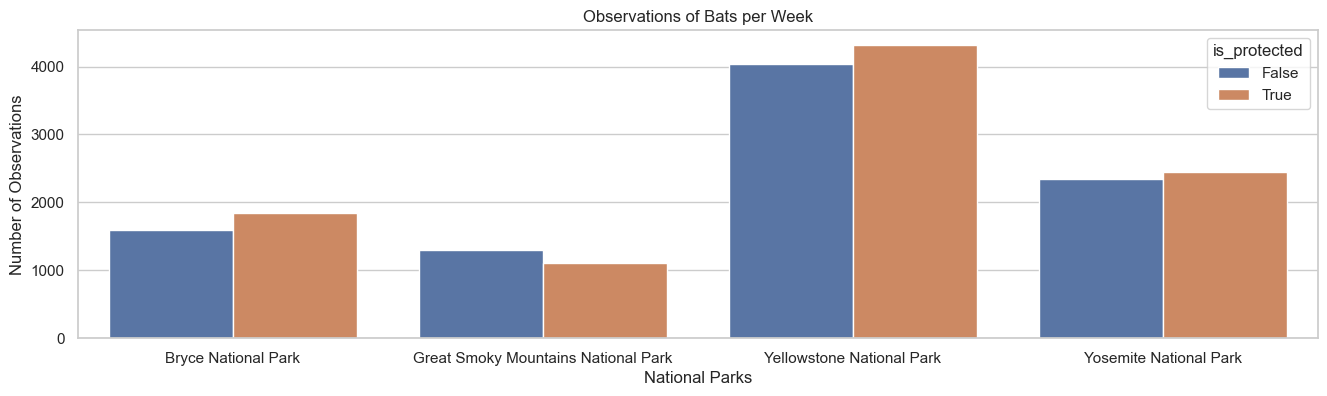

In [63]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.